In [1]:
import matplotlib.pyplot as plt
import numpy as np
# nicer figures using ggg plot style.
plt.style.use('ggplot')
from IPython.core.display import HTML

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
from IPython.core.pylabtools import figsize


# In[42]:


from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
from matplotlib.figure import Figure
import matplotlib.pylab as plt

import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [2]:
class Case: pass

In [3]:
def loadCase(file, name):
    caseClass = Case()
    case = loadmat(file)
    caseClass.time = case[name]['St']
    
    caseClass.nh_ch4_con = case[name]['concentrations']['nh_ch4']  
    caseClass.sh_ch4_con = case[name]['concentrations']['sh_ch4'] 
    caseClass.nh_oh_con  = case[name]['concentrations']['nh_oh'] 
    caseClass.sh_oh_con  = case[name]['concentrations']['sh_oh'] 
    caseClass.nh_co_con  = case[name]['concentrations']['nh_co'] 
    caseClass.sh_co_con  = case[name]['concentrations']['sh_co'] 
    return caseClass
   

In [4]:
dir = '/Volumes/yiyin/data/ch4_box/' 

# Fig 1

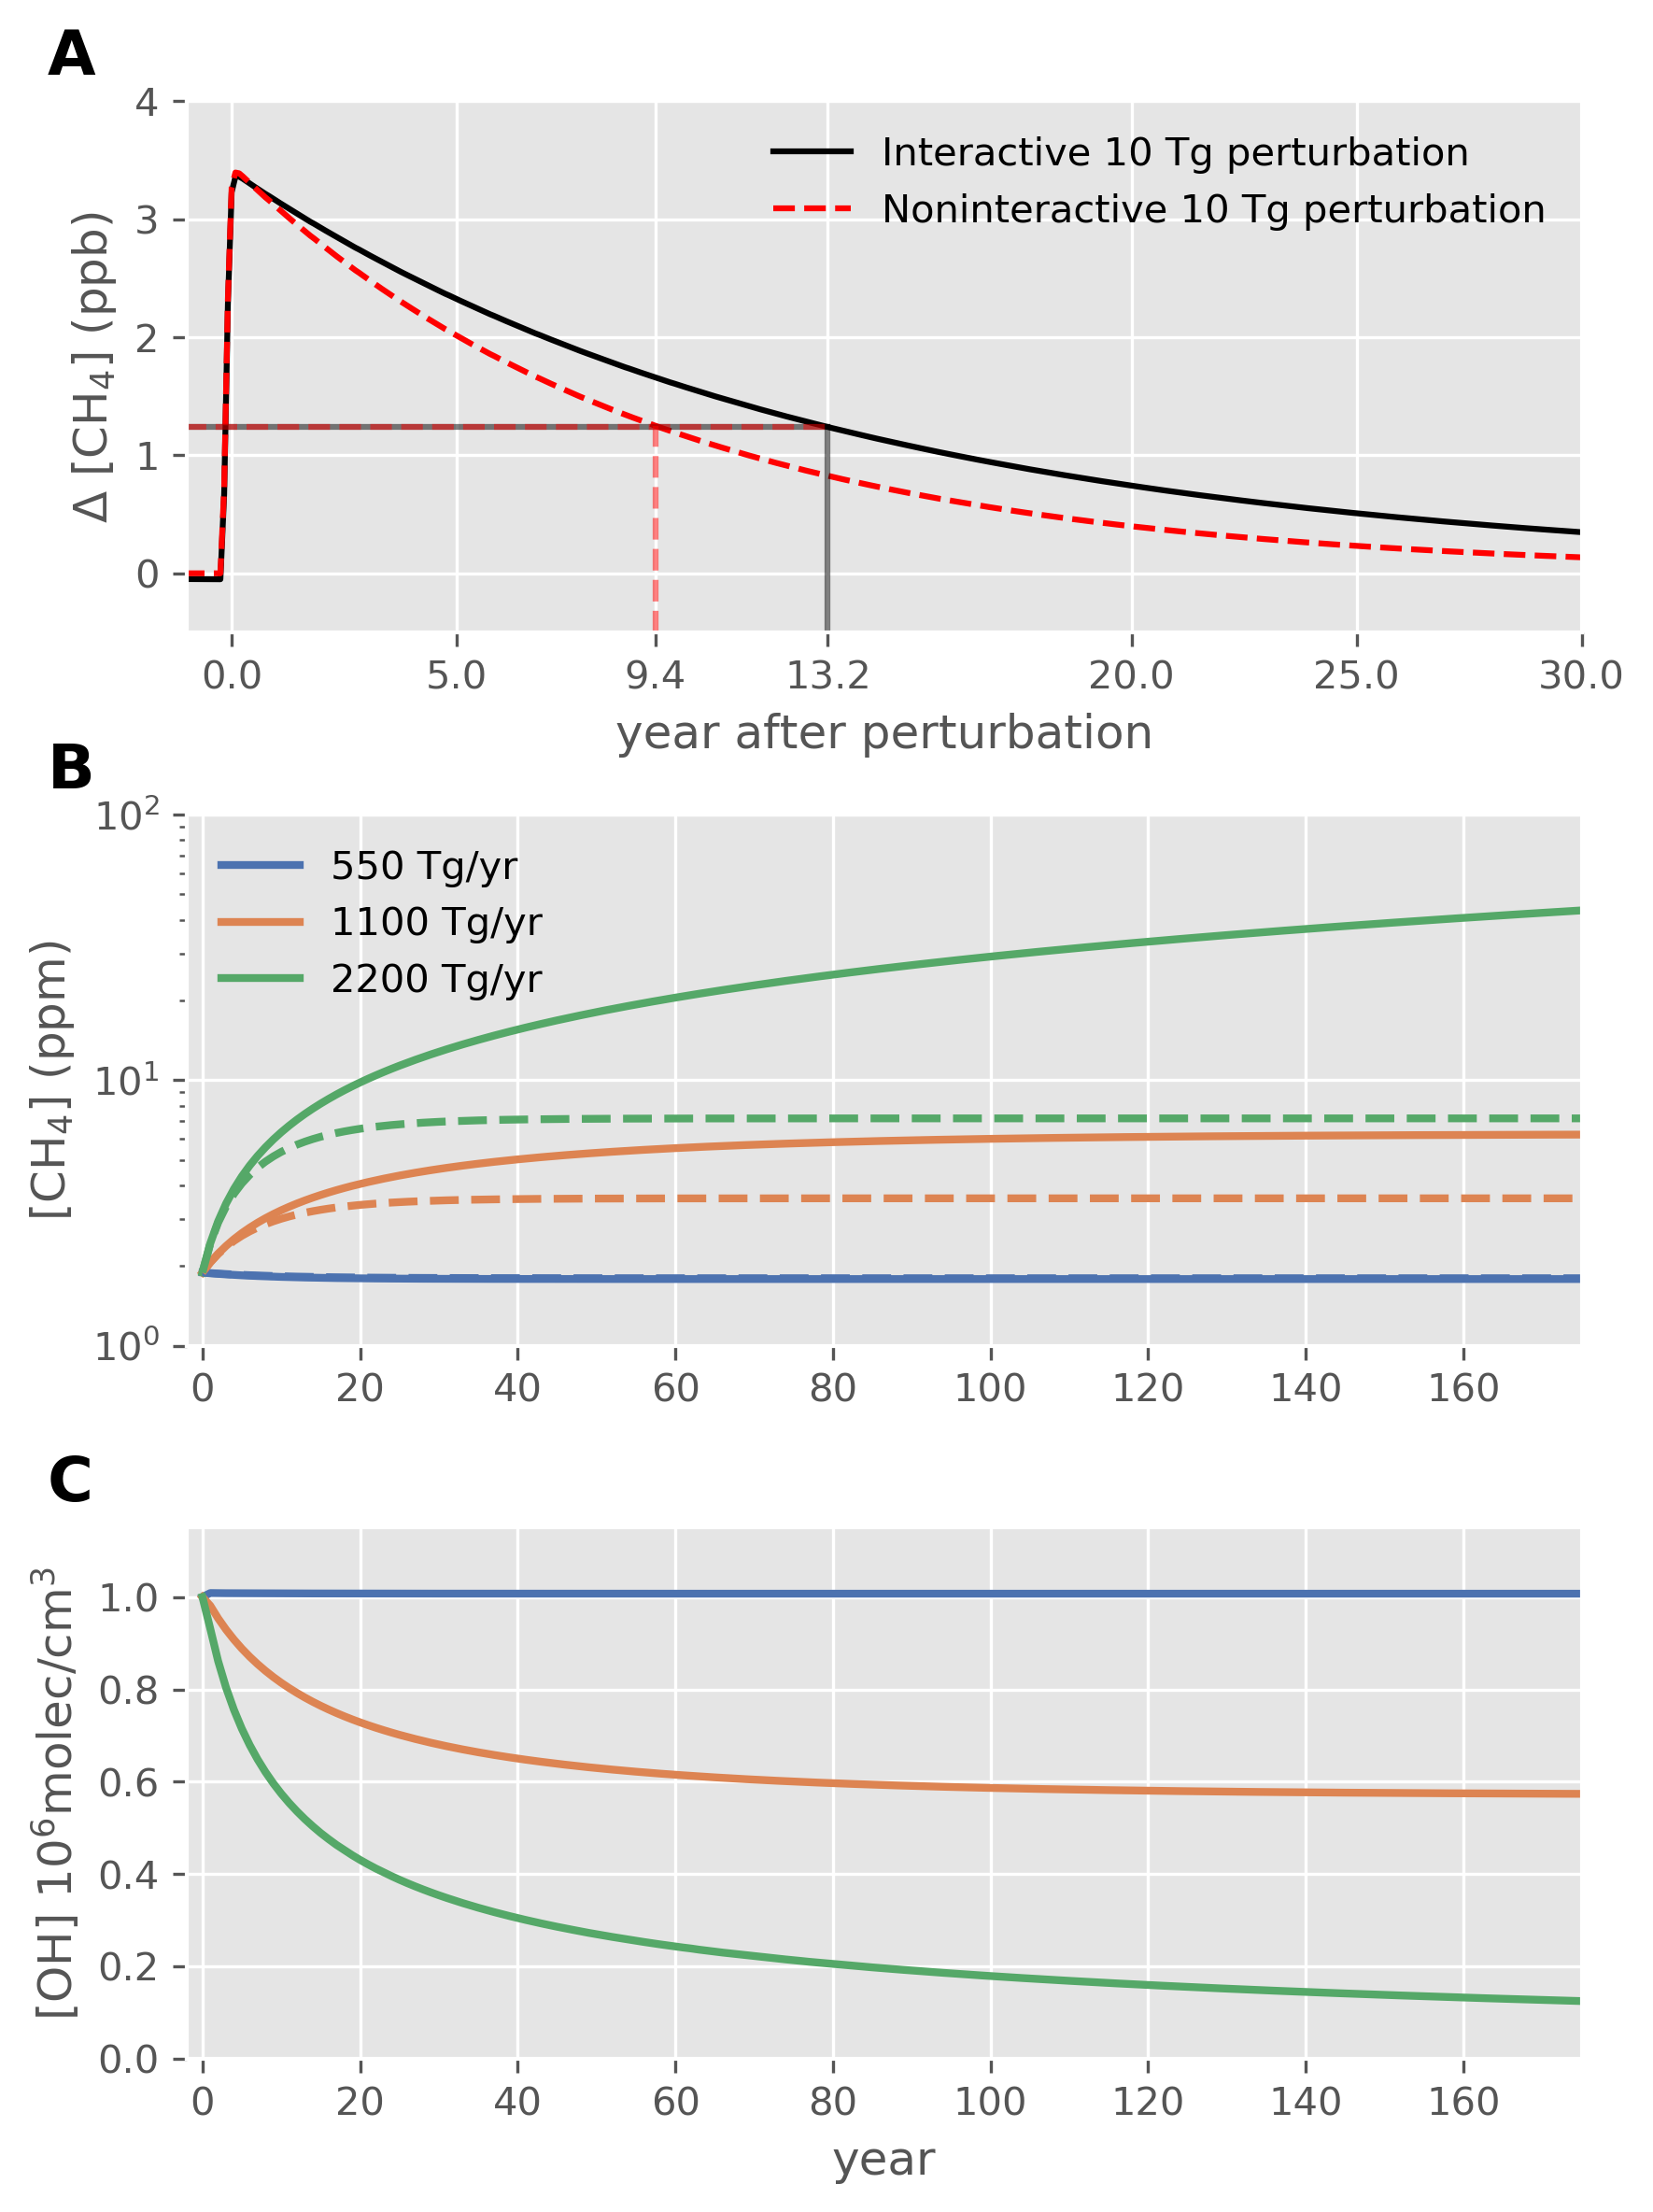

In [49]:
# Load data for panel 1
ss_test = loadmat(dir+'steady_state_test.mat')
import seaborn as sns
cp = sns.color_palette(palette="deep")
#sns.palplot(current_palette)

# Plot Panel 1 
#fig, (f1_sp3, f1_sp1, f1_sp2) = plt.subplots(3, 1, sharex=True, figsize=(6,8))
fig = plt.figure(num=None, figsize=(6, 8), dpi=300)
fig.subplots_adjust(hspace=0.0, wspace=0.)

f1_sp3 = fig.add_subplot(3,1,1)

from matplotlib.ticker import FormatStrFormatter
forward_test = loadmat('forward_model_test.mat')

large_pert_interactive = forward_test['out_large']['ch4']
small_pert_interactive = forward_test['out_small']['ch4']

large_pert_noninteractive = forward_test['out_large_noninteractive']['ch4']
small_pert_noninteractive = forward_test['out_small_noninteractive']['ch4']
time = [(i-100)/12 for i in range(len(small_pert_interactive))]

#f1_sp3 = fig1.add_subplot(3,1,3)
d1 = small_pert_interactive-small_pert_interactive[0]
d2 = small_pert_noninteractive-small_pert_noninteractive[0]
max1 = np.max(d1)
max2 = np.max(d2)

ind1 = np.argmin(abs(max1/np.e-d1))
ind2 = np.argmin(abs(max2/np.e-d2))

#f1_sp3.plot(time, large_pert_interactive, 'purple', label = 'Interactive 50Tg perturbation')
f1_sp3.plot(time, d1, 'k', label = 'Interactive 10 Tg perturbation')

#f1_sp3.plot(time, large_pert_noninteractive, 'purple', linestyle='dashed', label = 'Noninteractive 50 Tg perturbation')
f1_sp3.plot(time, d2, 'r', linestyle='dashed', label = 'Noninteractive 10 Tg perturbation')
f1_sp3.plot([time[0], time[ind1]], [max1/np.e, max1/np.e], 'k', alpha=0.5 )
f1_sp3.plot([time[0], time[ind1]], [max1/np.e, max1/np.e], 'r--', alpha=0.5 )

f1_sp3.plot([time[ind1], time[ind1]], [-0.5, max1/np.e], 'k', alpha=0.5 )
f1_sp3.plot([time[ind2], time[ind2]], [-0.5, max2/np.e], 'r--', alpha=0.5 )
#f1_sp3.plot(time, max1*np.exp(-np.asarray(time)/9),  'r', alpha=0.5 )
time[ind1]
f1_sp3.set_xlabel('year after perturbation', fontsize=12)
f1_sp3.set_ylabel('$\Delta$ [CH$_4$] (ppb)', fontsize=12)
#f1_sp3.set_title('Instantaneous Methane Perturbation')
f1_sp3.set_xlim((-1,30))
f1_sp3.set_ylim((-0.5,4))

leg=f1_sp1.legend(loc = 'best')
leg.draw_frame(False)
leg=f1_sp3.legend(loc = 'best')
leg.draw_frame(False)
plt.xticks([0,5,time[ind2],time[ind1],20,25,30],rotation=0)
f1_sp3.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

f1_sp3.text(-0.1, 1.05, 'A', transform=f1_sp3.transAxes, 
            size=16, weight='bold')
#plt.tight_layout()

f1_sp1 = fig.add_subplot(3,1,2)
# CH4 for interactive test 
interactive_ch4_1x = ss_test['interactive_out_1x']['ch4']
interactive_ch4_2x = ss_test['interactive_out_2x']['ch4']
interactive_ch4_4x = ss_test['interactive_out_4x']['ch4']

# noninteractive test for CH4
noninteractive_ch4_1x = ss_test['noninteractive_out_1x']['ch4']
noninteractive_ch4_2x = ss_test['noninteractive_out_2x']['ch4']
noninteractive_ch4_4x = ss_test['noninteractive_out_4x']['ch4']

time = [i for i in range(len(interactive_ch4_1x))] # time vector
f1_sp1.plot(time, interactive_ch4_1x/1e3, color=cp[0],lw=2, label = '550 Tg/yr')
f1_sp1.plot(time, interactive_ch4_2x/1e3, color=cp[1],lw=2, label = '1100 Tg/yr')
f1_sp1.plot(time, interactive_ch4_4x/1e3, color=cp[2],lw=2, label = '2200 Tg/yr')

f1_sp1.semilogy(time, noninteractive_ch4_1x/1e3, '--',lw=2,color=cp[0])
f1_sp1.semilogy(time, noninteractive_ch4_2x/1e3, '--',lw=2,color=cp[1])
f1_sp1.semilogy(time, noninteractive_ch4_4x/1e3, '--',lw=2, color=cp[2])
leg=f1_sp1.legend(loc=0)
leg.draw_frame(False)
f1_sp1.set_ylim((1,100))
#f1_sp1.set_xlabel('year')
f1_sp1.set_ylabel('[CH$_4$] (ppm)', fontsize=12)
f1_sp1.set_xlim((-2,175))
#f1_sp1.set_title('Methane Concentrations')


# load data for Panel b
# interactive OH concentrations 
interactive_oh_1x = ss_test['interactive_out_1x']['oh']
interactive_oh_2x = ss_test['interactive_out_2x']['oh']
interactive_oh_4x = ss_test['interactive_out_4x']['oh']

f1_sp2 = fig.add_subplot(3,1,3)
f1_sp2.plot(time, interactive_oh_1x/1e6, color=cp[0], lw=2)
f1_sp2.plot(time, interactive_oh_2x/1e6, color=cp[1], lw=2)
f1_sp2.plot(time, interactive_oh_4x/1e6, color=cp[2], lw=2)
f1_sp2.set_ylim((0.0,1.15))
f1_sp2.set_xlim((-2,175))
f1_sp2.set_xlabel('year', fontsize=12)
f1_sp2.set_ylabel(r'[OH] $10^6$molec/cm$^3$', fontsize=12)
#f1_sp2.set_title('OH concentrations')

# Add second axis for plotting the feedback factor
#feedback_subplot = f1_sp2.twinx()  # instantiate a second axes that shares the same x-axis

#feedback_1x = ss_test['feedback_1x']
#feedback_2x = ss_test['feedback_2x']
#feedback_4x = ss_test['feedback_4x']

#feedback_subplot.plot(time, feedback_1x, '-',color=cp[0], lw=2)
#feedback_subplot.plot(time, feedback_2x, '-', color=cp[1], lw=2)
#feedback_subplot.plot(time, feedback_4x, '-', color=cp[2], lw=2)
#feedback_subplot.set_ylabel('Feedback Factor')

plt.tight_layout()
f1_sp2.text(-0.1, 1.05, 'C', transform=f1_sp2.transAxes, 
            size=16, weight='bold')
f1_sp1.text(-0.1, 1.05, 'B', transform=f1_sp1.transAxes, 
            size=16, weight='bold')
plt.savefig('fig1_PART1_.pdf')


# Fig. 2

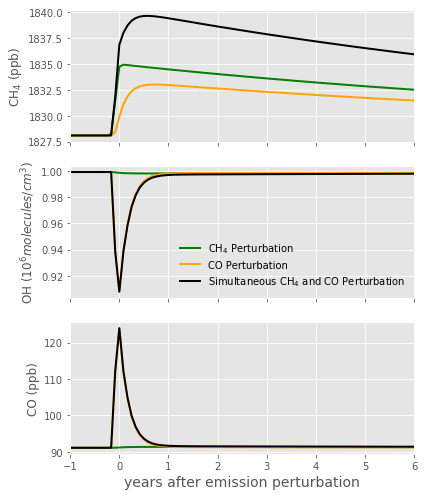

In [50]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# In[39]:


### Load data for syntehtic ENSO test 
start_month = 606
end_month = 1806

# load the data 
synthetic_enso = loadmat(dir+'synthetic_enso.mat')
noninteractive_ch4 = (synthetic_enso['ch4_out_noninteractive']['ch4'] )[start_month:end_month]

noninteractive_oh = ((synthetic_enso['ch4_out_noninteractive']['nh_oh'] + synthetic_enso['ch4_out_noninteractive']['sh_oh'])/2)[start_month:end_month]

time = np.arange(start_month, end_month) # perturbation will start at index 594
time = (time-1200)/12.0

case1_ch4 = ((synthetic_enso['ch4_out']['nh_ch4'] + synthetic_enso['ch4_out']['sh_ch4'])/2)[start_month:end_month]
case2_ch4 = ((synthetic_enso['co_out']['nh_ch4'] + synthetic_enso['co_out']['sh_ch4'])/2)[start_month:end_month]
case3_ch4 = ((synthetic_enso['ch4_co_out']['nh_ch4'] + synthetic_enso['ch4_co_out']['sh_ch4'])/2)[start_month:end_month]

case1_oh = ((synthetic_enso['ch4_out']['nh_oh'] + synthetic_enso['ch4_out']['sh_oh'])/2)[start_month:end_month]
case2_oh = ((synthetic_enso['co_out']['nh_oh'] + synthetic_enso['co_out']['sh_oh'])/2)[start_month:end_month]
case3_oh = ((synthetic_enso['ch4_co_out']['nh_oh'] + synthetic_enso['ch4_co_out']['sh_oh'])/2)[start_month:end_month]

case1_co = ((synthetic_enso['ch4_out']['nh_co'] + synthetic_enso['ch4_out']['sh_co'])/2)[start_month:end_month]
case2_co =( (synthetic_enso['co_out']['nh_co'] + synthetic_enso['co_out']['sh_co'])/2)[start_month:end_month]
case3_co = ((synthetic_enso['ch4_co_out']['nh_co'] + synthetic_enso['ch4_co_out']['sh_co'])/2)[start_month:end_month]

# Calculate the linear feedback by adding Case 1 and Case 2 responses
ch4_base = case1_ch4[0] * np.ones( case1_ch4.shape)
co_base = case1_co[0] * np.ones( case1_ch4.shape)
oh_base = case1_oh[0] * np.ones( case1_ch4.shape)

case1_ch4_diff = case1_ch4 - ch4_base
case2_ch4_diff = case2_ch4 - ch4_base
case1_co_diff = case1_co - co_base
case2_co_diff = case2_co - co_base
case1_oh_diff = case1_oh - oh_base
case2_oh_diff = case2_oh - oh_base

case4_ch4 = ch4_base + case1_ch4_diff + case2_ch4_diff
case4_co = co_base + case1_co_diff + case2_co_diff
case4_oh = oh_base + case1_oh_diff + case2_oh_diff

### GRL Fig 2: Synthetic ENSO Test 
#fig7 = plt.figure(figsize=(8,11))
fig7, (f7_p1, f7_p2, f7_p3) = plt.subplots(nrows=3, sharex=True,figsize=[6, 7])
#f7_p1 = plt.subplot(311)
f7_p1.plot(time, case1_ch4, 'green',lw=2)
#f7_p1.plot(time, noninteractive_ch4, 'green',linestyle='--',lw=2)
f7_p1.plot(time, case2_ch4, 'orange',lw=2)
f7_p1.plot(time, case3_ch4, 'black',lw=2)
#f7_p1.plot(time, case4_ch4, 'blue', linestyle='dotted')
#f7_p1.set_xlabel('Months')
f7_p1.set_ylabel('CH$_4$ (ppb)')
#f7_p1.set_title(r'$CH_4$ Concentrations')

#f7_p2,ax2,=plt.subplot(312)
f7_p2.plot(time, case1_oh/1e6, 'green',lw=2)
f7_p2.plot(time, case2_oh/1e6, 'orange',lw=2)
f7_p2.plot(time, case3_oh/1e6, 'black',lw=2)
#f7_p2.plot(time, case4_oh/1e6, 'blue', linestyle = 'dotted')
#f7_p2.set_xlabel('Months')
f7_p2.set_ylabel(r'OH ($10^6 molecules/cm^3$)')
#f7_p2.set_title('OH Concentrations')
#f7_p2.set_ylim((0.95,1))

#f7_p3 = plt.subplot(313)
f7_p3.plot(time, case1_co, 'green',lw=2)
f7_p3.plot(time, case2_co, 'orange',lw=2)
f7_p3.plot(time, case3_co, 'black',lw=2)
#f7_p3.plot(time, case4_co, 'blue', linestyle = 'dotted')
f7_p3.set_xlabel('years after emission perturbation', fontsize=14)
f7_p3.set_ylabel('CO (ppb)')
#f7_p3.set_title('CO Concentrations')
leg=f7_p2.legend(['CH$_4$ Perturbation', 'CO Perturbation', 'Simultaneous CH$_4$ and CO Perturbation'], loc='lower right')
leg.draw_frame(False)
fig7.tight_layout()
#f7_p3.set_xlim((-3,35))
#f7_p2.set_xlim((-3,35))
f7_p1.set_xlim((-1,6))

#axins = zoomed_inset_axes(f7_p2, zoom=0.5, loc='upper right')


#fig7.show()
plt.tight_layout()
fig7.savefig('synthetic_enso_test.pdf')

In [24]:
case0 = loadmat(dir+'case0_test_tau0.mat')
case1 = loadmat(dir+'case1_test_tau0.mat')
case2 = loadmat(dir+'case2_test_tau0.mat')
case3 = loadmat(dir+'case3_test_tau0.mat')
case4 = loadmat(dir+'case4_test_tau0.mat')
case5 = loadmat(dir+'case5_test_tau0.mat')

### for Refrence Case 
case0_nh_ch4 = case0['case0']['nh_ch4_ems'] 
case0_sh_ch4 = case0['case0']['sh_ch4_ems'] 
case0_nh_oh = case0['case0']['nh_oh'] 
case0_sh_oh = case0['case0']['sh_oh'] 
case0_nh_co = case0['case0']['nh_co_ems'] 
case0_sh_co = case0['case0']['sh_co_ems'] 

# Get global numbers
case0_ch4_ems = case0_nh_ch4 + case0_sh_ch4
case0_co_ems = case0_nh_co + case0_sh_co
case0_oh_con = (case0_nh_oh + case0_sh_oh)/2.0


case1_nh_ch4 = case1['case1']['nh_ch4_ems'] 
case1_sh_ch4 = case1['case1']['sh_ch4_ems'] 
case1_nh_oh = case1['case1']['nh_oh_ems'] 
case1_sh_oh = case1['case1']['sh_oh_ems'] 
case1_nh_co = case1['case1']['nh_co_ems'] 
case1_sh_co = case1['case1']['sh_co_ems'] 



case2_nh_ch4 = case2['case2']['nh_ch4_ems'] 
case2_sh_ch4 = case2['case2']['sh_ch4_ems'] 
case2_nh_oh = case2['case2']['nh_oh_ems'] 
case2_sh_oh = case2['case2']['sh_oh_ems'] 
case2_nh_co = case2['case2']['nh_co_ems'] 
case2_sh_co = case2['case2']['sh_co_ems'] 



case3_nh_ch4 = case3['case3']['nh_ch4_ems'] 
case3_sh_ch4 = case3['case3']['sh_ch4_ems'] 
case3_nh_oh = case3['case3']['nh_oh_ems'] 
case3_sh_oh = case3['case3']['sh_oh_ems'] 
case3_nh_co = case3['case3']['nh_co_ems'] 
case3_sh_co = case3['case3']['sh_co_ems'] 

case4_nh_ch4 = case4['case4']['nh_ch4_ems'] 
case4_sh_ch4 = case4['case4']['sh_ch4_ems'] 
case4_nh_oh = case4['case4']['nh_oh_ems'] 
case4_sh_oh = case4['case4']['sh_oh_ems'] 
case4_nh_co = case4['case4']['nh_co_ems'] 
case4_sh_co = case4['case4']['sh_co_ems'] 


case5_nh_ch4 = case5['case5']['nh_ch4_ems'] 
case5_sh_ch4 = case5['case5']['sh_ch4_ems'] 
case5_nh_oh = case5['case5']['nh_oh_ems'] 
case5_sh_oh = case5['case5']['sh_oh_ems'] 
case5_nh_co = case5['case5']['nh_co_ems'] 
case5_sh_co = case5['case5']['sh_co_ems'] 



# add up nh and sh emissions 
# Methane CH4 
case1_ch4_ems = case1_nh_ch4 + case1_sh_ch4
case2_ch4_ems = case2_nh_ch4 + case2_sh_ch4
case3_ch4_ems = case3_nh_ch4 + case3_sh_ch4
case4_ch4_ems = case4_nh_ch4 + case4_sh_ch4
case5_ch4_ems = case5_nh_ch4 + case5_sh_ch4

# Hydroxyl OH 
case1_oh_ems = case1_nh_oh + case1_sh_oh
case2_oh_ems = case2_nh_oh + case2_sh_oh
case3_oh_ems = case3_nh_oh + case3_sh_oh
case4_oh_ems = case4_nh_oh + case4_sh_oh
case5_oh_ems = case5_nh_oh + case5_sh_oh

# Carbon monoxide CO 
case1_co_ems = case1_nh_co + case1_sh_co
case2_co_ems = case2_nh_co + case2_sh_co 
case3_co_ems = case3_nh_co + case3_sh_co 
case4_co_ems = case4_nh_co + case4_sh_co 
case5_co_ems = case5_nh_co + case5_sh_co 

### Extract observations for plotting fits
nh_ch4_obs = case3['obs']['nh_ch4']
sh_ch4_obs = case3['obs']['sh_ch4']

nh_co_obs = case3['obs']['nh_co']
sh_co_obs = case3['obs']['sh_co']

nh_mcf_obs = case0['obs']['nh_mcf']
sh_mcf_obs = case0['obs']['sh_mcf']

time = np.linspace(1980, 2018,39)
#plt.rcParams.update({'font.size': 18})


### read the concentrations
case0_nh_co_con = case0 ['case0']['concentrations']['nh_co']
case0_sh_co_con = case0 ['case0']['concentrations']['sh_co']
case0_mcf_con = (case0['case0']['concentrations']['sh_mcf']+case0['case0']['concentrations']['nh_mcf'])/2
case1_mcf_con = (case1['case1']['concentrations']['sh_mcf']+case1['case1']['concentrations']['nh_mcf'])/2
case2_mcf_con = (case2['case2']['concentrations']['sh_mcf']+case2['case2']['concentrations']['nh_mcf'])/2
case3_mcf_con = (case3['case3']['concentrations']['sh_mcf']+case3['case3']['concentrations']['nh_mcf'])/2
case4_mcf_con = (case4['case4']['concentrations']['sh_mcf']+case4['case4']['concentrations']['nh_mcf'])/2
case5_mcf_con = (case5['case5']['concentrations']['sh_mcf']+case5['case5']['concentrations']['nh_mcf'])/2

# case 1
case1_nh_ch4_con = case1 ['case1']['concentrations']['nh_ch4']
case1_nh_oh_con = case1 ['case1']['concentrations']['nh_oh']
case1_nh_co_con = case1 ['case1']['concentrations']['nh_co']
case1_sh_ch4_con = case1 ['case1']['concentrations']['sh_ch4']
case1_sh_oh_con = case1 ['case1']['concentrations']['sh_oh']
case1_sh_co_con = case1 ['case1']['concentrations']['sh_co']


# case 2
case2_nh_ch4_con = case2['case2']['concentrations']['nh_ch4']
case2_nh_oh_con = case2['case2']['concentrations']['nh_oh']
case2_nh_co_con = case2['case2']['concentrations']['nh_co']

case2_sh_ch4_con = case2['case2']['concentrations']['sh_ch4']
case2_sh_oh_con = case2['case2']['concentrations']['sh_oh']
case2_sh_co_con = case2['case2']['concentrations']['sh_co']



# Case 3
case3_nh_ch4_con = case3 ['case3']['concentrations']['nh_ch4']
case3_nh_oh_con = case3 ['case3']['concentrations']['nh_oh']
case3_nh_co_con = case3 ['case3']['concentrations']['nh_co']
case3_sh_co_con = case3 ['case3']['concentrations']['sh_co']
case3_sh_ch4_con = case3 ['case3']['concentrations']['sh_ch4']
case3_sh_oh_con = case3 ['case3']['concentrations']['sh_oh']

# Case 4
case4_nh_ch4_con = case4 ['case4']['concentrations']['nh_ch4']
case4_nh_oh_con = case4 ['case4']['concentrations']['nh_oh']
case4_nh_co_con = case4 ['case4']['concentrations']['nh_co']

case4_sh_ch4_con = case4 ['case4']['concentrations']['sh_ch4']
case4_sh_oh_con = case4 ['case4']['concentrations']['sh_oh']
case4_sh_co_con = case4 ['case4']['concentrations']['sh_co']

# case 5
case5_nh_ch4_con = case5 ['case5']['concentrations']['nh_ch4']
case5_nh_oh_con = case5 ['case5']['concentrations']['nh_oh']
case5_nh_co_con = case5 ['case5']['concentrations']['nh_co']

case5_sh_ch4_con = case5 ['case5']['concentrations']['sh_ch4']
case5_sh_oh_con = case5 ['case5']['concentrations']['sh_oh']
case5_sh_co_con = case5 ['case5']['concentrations']['sh_co']

# Take global mean of OH concentrations
case1_oh_con = 0.5*(case1_nh_oh_con + case1_sh_oh_con)
case2_oh_con = 0.5*(case2_nh_oh_con + case2_sh_oh_con)
case3_oh_con = 0.5*(case3_nh_oh_con + case3_sh_oh_con)
case4_oh_con = 0.5*(case4_nh_oh_con + case4_sh_oh_con)
case5_oh_con = 0.5*(case5_nh_oh_con + case5_sh_oh_con)

case0_co_con = 0.5*(case0_nh_co_con + case0_sh_co_con)
case1_co_con = 0.5*(case1_nh_co_con + case1_sh_co_con)
case2_co_con = 0.5*(case2_nh_co_con + case2_sh_co_con)
case3_co_con = 0.5*(case3_nh_co_con + case3_sh_co_con)
case4_co_con = 0.5*(case4_nh_co_con + case4_sh_co_con)
case5_co_con = 0.5*(case5_nh_co_con + case5_sh_co_con)


case0_mean = np.mean(case0_oh_con)*np.ones(case5_oh_con.shape)
case1_mean = np.mean(case1_oh_con)*np.ones(case5_oh_con.shape)
case2_mean = np.mean(case2_oh_con)*np.ones(case5_oh_con.shape)
case3_mean = np.mean(case3_oh_con)*np.ones(case5_oh_con.shape)
case4_mean = np.mean(case4_oh_con)*np.ones(case5_oh_con.shape)
case5_mean = np.mean(case5_oh_con)*np.ones(case5_oh_con.shape)

case0_oh_percent = 1/case0_mean[0]*(case0_oh_con - case0_mean)
case1_oh_percent = 1/case1_mean[0]*(case1_oh_con - case1_mean)
case2_oh_percent = 1/case2_mean[0]*(case2_oh_con - case2_mean)
case3_oh_percent = 1/case3_mean[0]*(case3_oh_con - case3_mean)
case4_oh_percent = 1/case4_mean[0]*(case4_oh_con - case4_mean)
case5_oh_percent = 1/case5_mean[0]*(case5_oh_con - case5_mean)

Created case_emissions.pdf


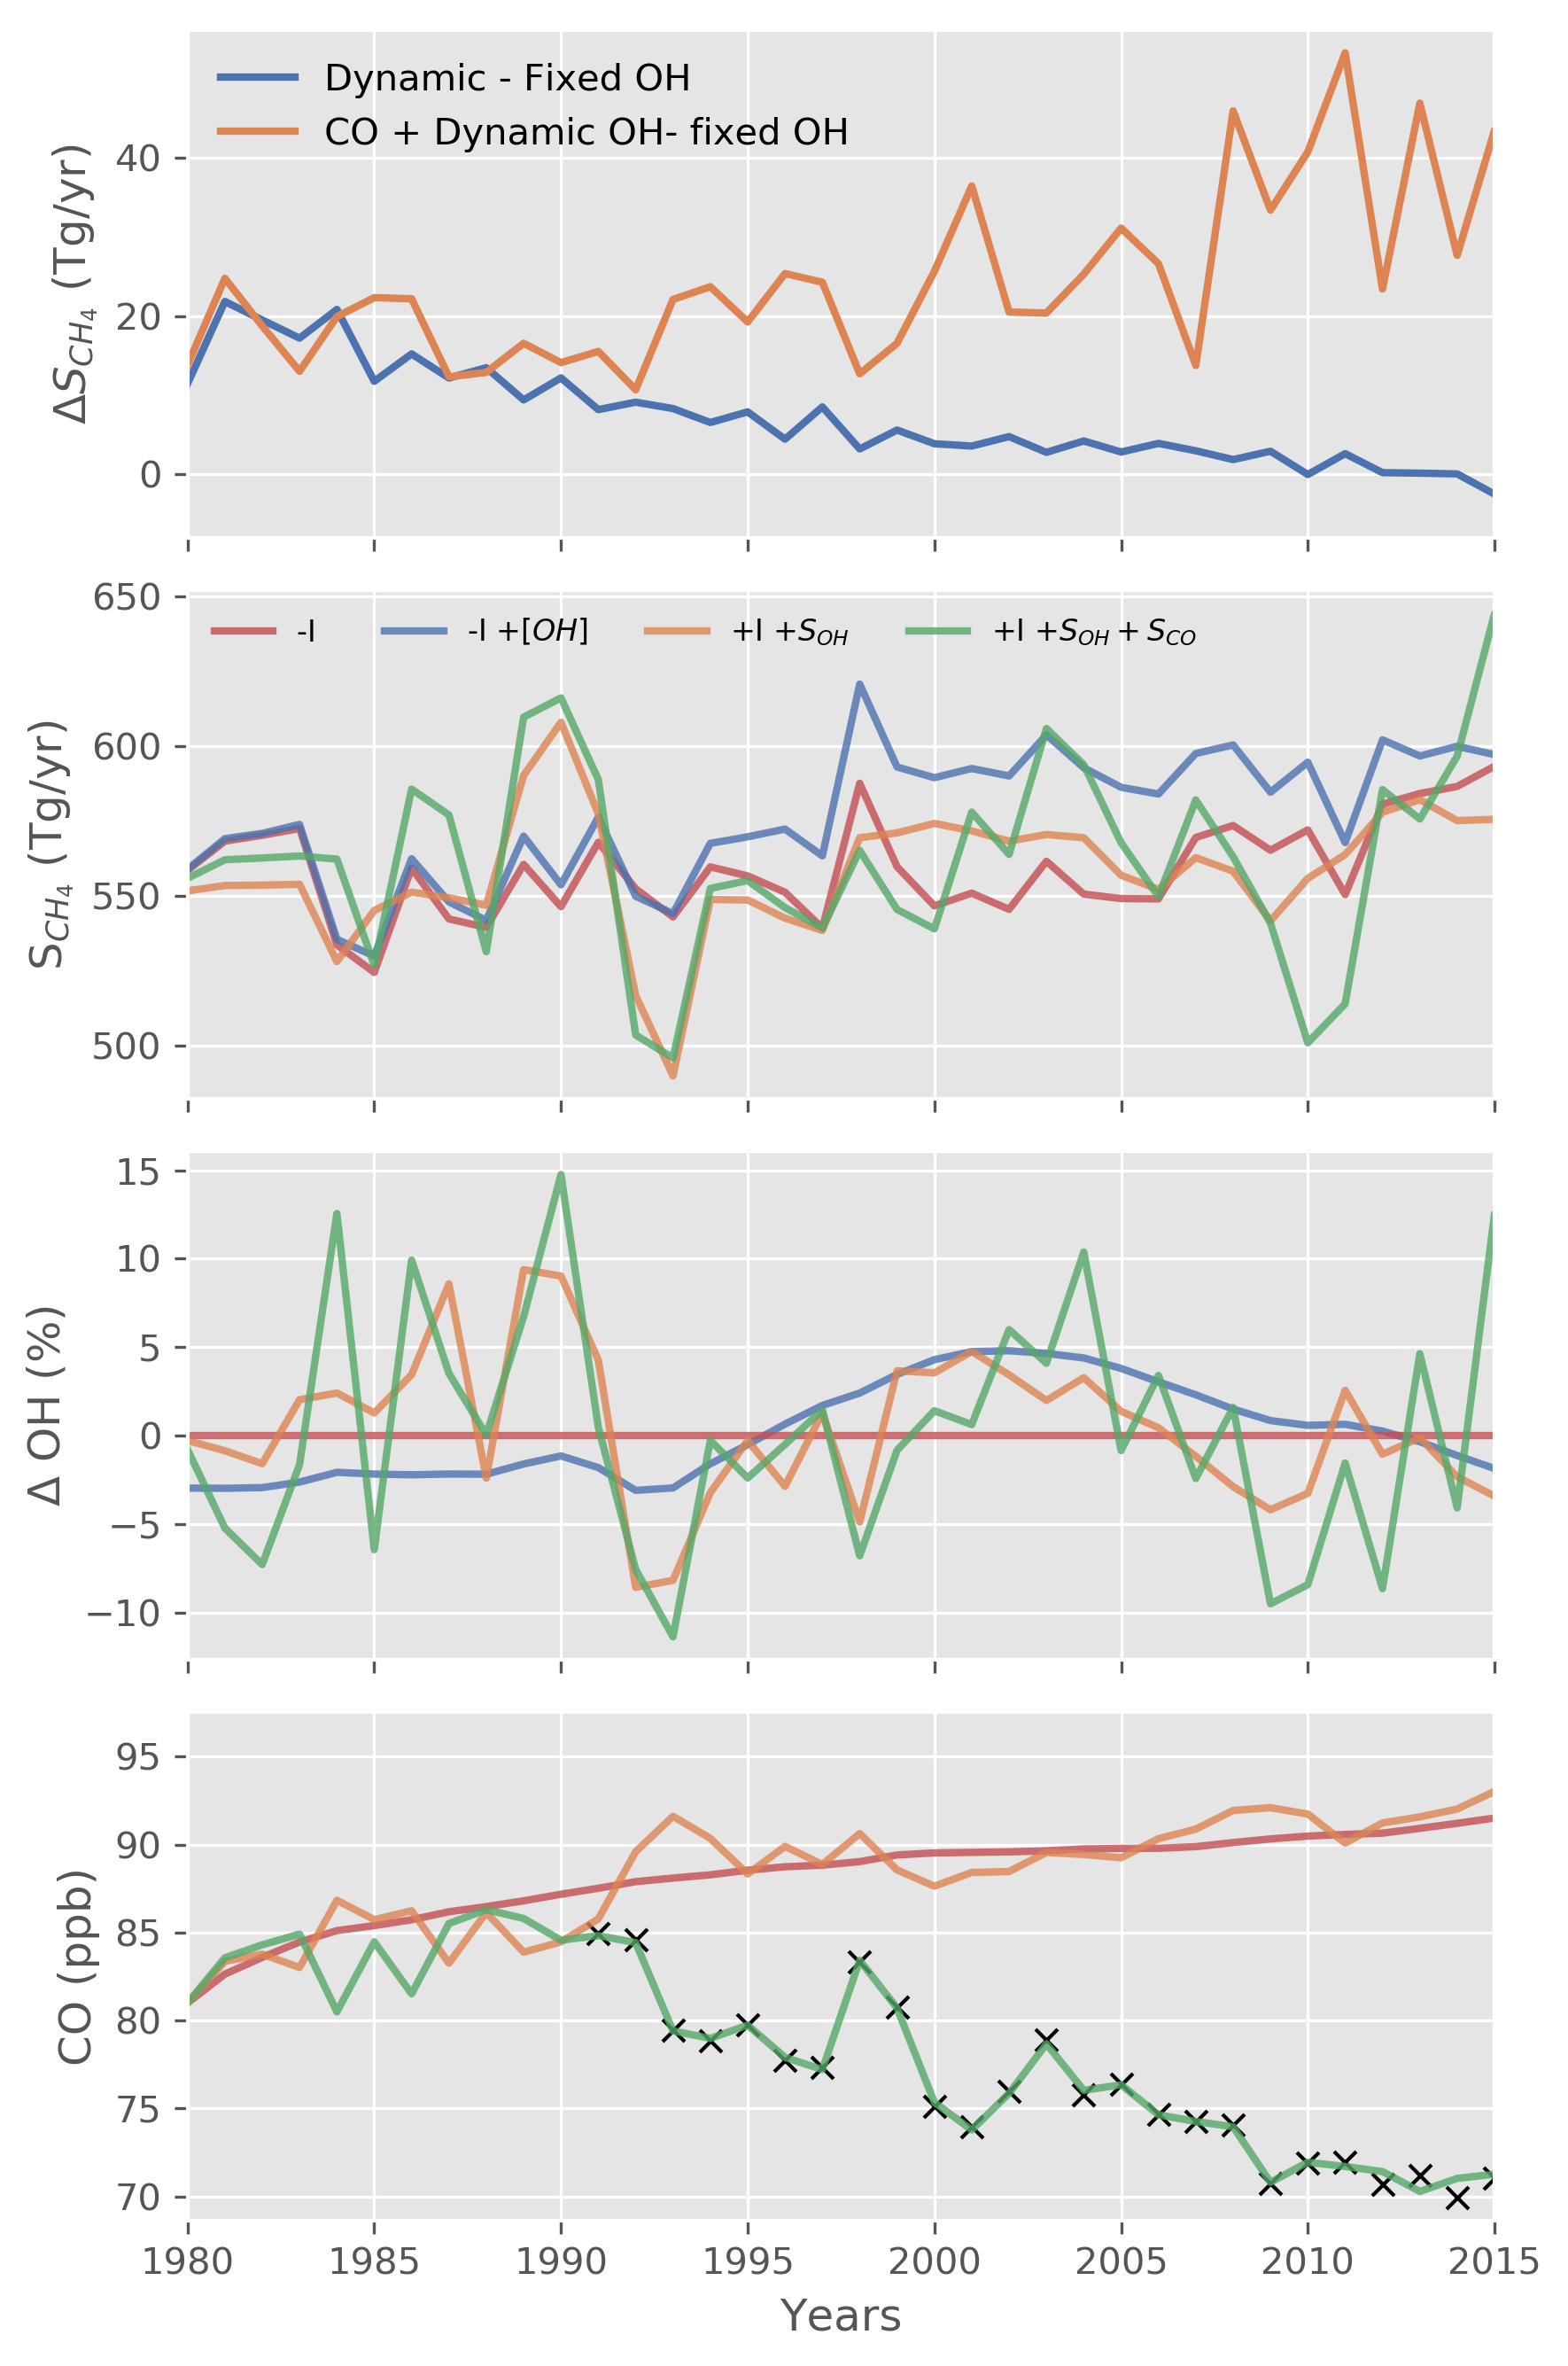

In [48]:
time2= np.linspace(1980, 2017,38)
### GRL Figure 4: Plotting the figures from real data inversions 
fig, (f5_sp1, ch4_subplot, oh_subplot, co_subplot) = plt.subplots(nrows=4, sharex=True,figsize=[6, 9], dpi=300)
#fig = plt.figure(num=None, figsize=(8, 11))
#fig.subplots_adjust(hspace=0.2, wspace=0.2)
#f5_sp1 = fig5.add_subplot(1,1,1)
f5_sp1.plot(time2 , case2_ch4_ems-case1_ch4_ems, color  =cp[0],linewidth=2)
f5_sp1.plot(time2, case3_ch4_ems-case1_ch4_ems, color =cp[1],linewidth=2)

#f5_sp1.plot(time2, case2_ch4_ems-20, color='green')
#f5_sp1.plot(time2, case3_ch4_ems-20, color = 'red')
leg=f5_sp1.legend(['Dynamic - Fixed OH', 'CO + Dynamic OH- fixed OH'], loc = 'upper left', fontsize=10)
leg.draw_frame(False)
#f5_sp1.set_xlabel('Years')
f5_sp1.set_ylabel('$\Delta S_{CH_4}$ (Tg/yr)')
#f5_sp1.set_title(r'$CH_4$ Emissions from Inversion')


#f5_sp2.set_title('CO Concentrations in Northern Hemisphere')
#f5_sp1.set_ylim((-10,25))
f5_sp1.set_xlim((1980,2017))
#ch4_subplot = fig.add_subplot(3,1,1)
ch4_subplot.plot(time2 , case1_ch4_ems, color = cp[3], lw=2, alpha=0.8,label='-I ')
ch4_subplot.plot(time2 , case0_ch4_ems, color =cp[0], linestyle='-', lw=2,alpha=0.8, label='-I $+[OH]$')

#ch4_subplot.plot(time2, case2_ch4_ems, color='green')
#ch4_subplot.plot(time2, case3_ch4_ems, color = 'red')
ch4_subplot.plot(time2, case4_ch4_ems, color = cp[1], lw=2, alpha=0.8,label=r'+I $+S_{OH}$')
ch4_subplot.plot(time2, case5_ch4_ems, color = cp[2], lw=2,alpha=0.8, label=r'+I $+S_{OH} +S_{CO}$ ')
#ch4_subplot.set_title(r'CH$_4$ Emissions from Inversion')
#ch4_subplot.set_xlabel('Years')
ch4_subplot.set_ylabel('S$_{CH_4}$ (Tg/yr)')

Soh = 6100/2;#np.mean(0.5*case4_nh_oh+0.5*case4_sh_oh)
#oh_subplot = fig.add_subplot(3,1,2)
oh_subplot.plot(time2 , 100*case0_oh_percent, color =cp[0],alpha=0.8, linestyle='-', lw=2 )
oh_subplot.plot(time2 , 100*case1_oh_percent, color = cp[3],alpha=0.8, lw=2 )
#oh_subplot.plot(time2 , ((0.5*case4_nh_oh+0.5*case4_sh_oh)/Soh-1)*100, color = cp[3], lw=2,linestyle='--')
#oh_subplot.plot(time2 , 100*case2_oh_percent, color = 'green')
#oh_subplot.plot(time2 , 100*case3_oh_percent, color = 'red')
oh_subplot.plot(time2 , 100*case4_oh_percent, color = cp[1],alpha=0.8, lw=2)
oh_subplot.plot(time2 , 100*case5_oh_percent, color = cp[2],alpha=0.8, lw=2)
#oh_subplot.plot(time2 , ((0.5*case5_nh_oh+0.5*case5_sh_oh)/Soh-1)*100, color = cp[2], lw=2,linestyle='--')
#oh_subplot.set_ylim((-6,6))
#oh_subplot.set_title('OH variability in percent')
#oh_subplot.set_xlabel('Years')
oh_subplot.set_ylabel('$\Delta$ OH (%)')

#enso_subplot = oh_subplot.twinx()  # instantiate a second axes that shares the same x-axis
#enso_index = loadmat('enso_data.mat')['averaged_data']

#enso_subplot.scatter(time, enso_index)
#enso_subplot.set_ylabel('ENSO Index')

# plot CO emissions 
#co_subplot = fig.add_subplot(3,1,3)
#co_subplot.plot(time2 , case0_co_con , color = cp[0], lw=3, label='-I +[OH]')
co_subplot.plot(time2 , 0.5*nh_co_obs+0.5*sh_co_obs, 'kx', label='Observations')
#co_subplot.plot(time , nh_co_obs, 'kx', label='Observations')
#co_subplot.plot(time , sh_co_obs, 'ko', label='Observations')
co_subplot.plot(time2 , case1_co_con, color  = cp[3], lw=2,alpha=0.8, label='-I -[OH]')
#co_subplot.plot(time2, case2_co_con, color = 'green', label='+I/+[OH]')
#co_subplot.plot(time2, case3_co_con, color = 'red', label=r'+I/+[OH]/+$S_{CO}$')
co_subplot.plot(time2, case4_co_con, color = cp[1],alpha=0.8, lw=2 )
co_subplot.plot(time2, case5_co_con, color = cp[2],alpha=0.8, lw=2)
#co_subplot.set_title('CO Source from Inversion')
co_subplot.set_xlabel('Years')
co_subplot.set_ylabel('CO (ppb)')
co_subplot.set_xlim((1980,2015))
#co_subplot.set_ylim((65,100))
leg=ch4_subplot.legend(loc="upper left",fontsize=8, ncol=4)
leg.draw_frame(False)
fig.subplots_adjust(wspace=0.4)
fig.tight_layout()
fig.savefig('case_emissions_0years.pdf')
print('Created case_emissions.pdf')

# In[5]:







# In[8]:





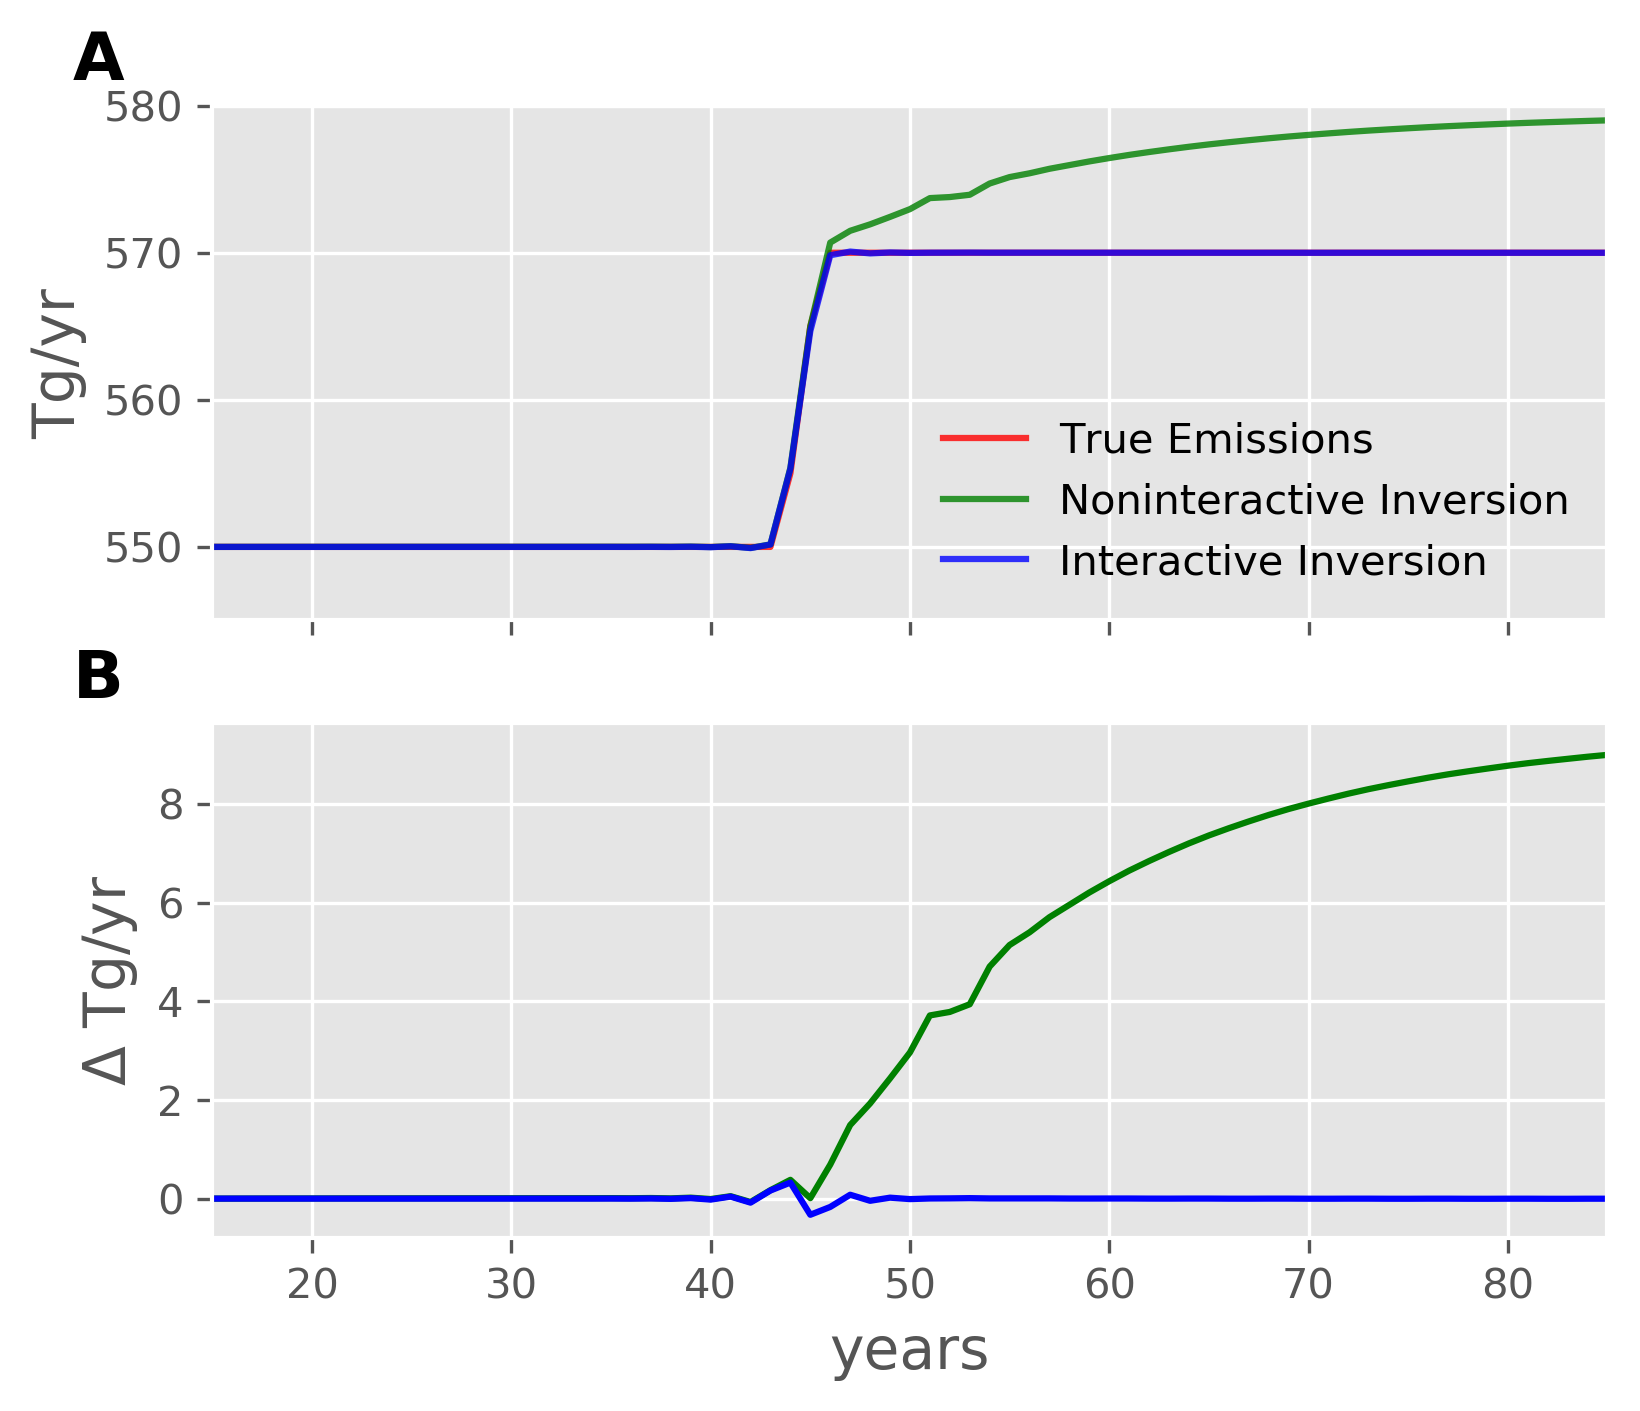

In [46]:
# load results from synthetic emissions inversion 
synth_ems = loadmat(dir+'synthetic_inversion_test_low_soh.mat')

actual_ems = (synth_ems['synthetic_sh_actual'] + synth_ems['synthetic_nh_actual'])[4:-4]
noninteractive_ems = (synth_ems['synthetic_sh_noninteractive_ems'] + synth_ems['synthetic_noninteractive_nh_ems'])[4:-4]
interactive_ems = (synth_ems['synthetic_sh_interactive_ems'] + synth_ems['synthetic_interactive_nh_ems'])[4:-4]
time3 = [i for i in range(0, len(actual_ems))]
np.convolve([1,2,3],[0,1,0.5], 'same')
kernel = [0.25,0.5,0.25]
interactive_diff = np.convolve(interactive_ems - actual_ems, kernel, 'same')
noninteractive_diff = np.convolve(noninteractive_ems - actual_ems, kernel, 'same')

### GRL Fig 3: Synthetic Emissions Inversion Test 
fig6, (fig6_sp1, fig6_sp2) = plt.subplots(2, 1, sharex=True, figsize=(6,5), dpi=300)
#plt.subplots(2, 1, sharex=True, figsize=(6,5))
#fig6.subplots_adjust(hspace=0.2, wspace=0.2)
#fig6_sp1 = fig6.add_subplot(1,2,1)
fig6_sp1.plot(time3, np.convolve(actual_ems, kernel, 'same'), 'r-', alpha=0.8)
fig6_sp1.plot(time3, np.convolve(noninteractive_ems, kernel, 'same'), 'g', alpha=0.8)
fig6_sp1.plot(time3, np.convolve(interactive_ems, kernel, 'same'), 'b', alpha=0.8)
fig6_sp1.set_ylim((545,580))
#fig6_sp1.set_xlabel('years', fontsize=16)
fig6_sp1.set_ylabel('Tg/yr', fontsize=14)
#fig6.suptitle('Synthetic Emissions Test', fontsize=16)
#fig6_sp1.set_title('Calculated Emissions', fontsize=16)
leg=fig6_sp1.legend(['True Emissions' , 'Noninteractive Inversion', 'Interactive Inversion'], loc='best', fontsize=10)
leg.draw_frame(False)
fig6_sp1.set_xlim([15,85])

#fig6_sp2 = fig6.add_subplot(1,2,2)
fig6_sp2.plot(time3, noninteractive_diff, 'g')
fig6_sp2.plot(time3, interactive_diff, 'b')
fig6_sp2.set_xlabel('years', fontsize=14)
fig6_sp2.set_ylabel('$\Delta$ Tg/yr', fontsize=14)
#fig6_sp2.set_title('Inversion Error', fontsize=16)
fig6_sp2.set_xlim([15,85])
fig6_sp2.text(-0.1, 1.05, 'B', transform=fig6_sp2.transAxes, 
            size=16, weight='bold')
fig6_sp1.text(-0.1, 1.05, 'A', transform=fig6_sp1.transAxes, 
            size=16, weight='bold')
fig6.savefig('synthetic_emissions_test_v1.pdf')

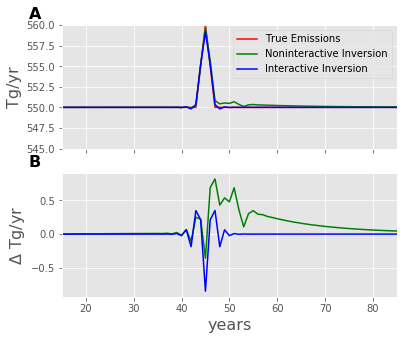

In [204]:
# load results from synthetic emissions inversion 
synth_ems = loadmat('synthetic_inversion_test_pulse.mat')

actual_ems = (synth_ems['synthetic_sh_actual'] + synth_ems['synthetic_nh_actual'])[4:-4]
noninteractive_ems = (synth_ems['synthetic_sh_noninteractive_ems'] + synth_ems['synthetic_noninteractive_nh_ems'])[4:-4]
interactive_ems = (synth_ems['synthetic_sh_interactive_ems'] + synth_ems['synthetic_interactive_nh_ems'])[4:-4]
time3 = [i for i in range(0, len(actual_ems))]
np.convolve([1,2,3],[0,1,0.5], 'same')
kernel = [0.25,0.5,0.25]
interactive_diff = np.convolve(interactive_ems - actual_ems, kernel, 'same')
noninteractive_diff = np.convolve(noninteractive_ems - actual_ems, kernel, 'same')

### GRL Fig 3: Synthetic Emissions Inversion Test 
fig6, (fig6_sp1, fig6_sp2) = plt.subplots(2, 1, sharex=True, figsize=(6,5))
#plt.subplots(2, 1, sharex=True, figsize=(6,5))
#fig6.subplots_adjust(hspace=0.2, wspace=0.2)
#fig6_sp1 = fig6.add_subplot(1,2,1)
fig6_sp1.plot(time3, np.convolve(actual_ems, kernel, 'same'), 'r-')
fig6_sp1.plot(time3, np.convolve(noninteractive_ems, kernel, 'same'), 'g')
fig6_sp1.plot(time3, np.convolve(interactive_ems, kernel, 'same'), 'b')
fig6_sp1.set_ylim((545,560))
#fig6_sp1.set_xlabel('years', fontsize=16)
fig6_sp1.set_ylabel('Tg/yr', fontsize=16)
#fig6.suptitle('Synthetic Emissions Test', fontsize=16)
#fig6_sp1.set_title('Calculated Emissions', fontsize=16)
fig6_sp1.legend(['True Emissions' , 'Noninteractive Inversion', 'Interactive Inversion'], loc='best', fontsize=10)
fig6_sp1.set_xlim([15,85])

#fig6_sp2 = fig6.add_subplot(1,2,2)
fig6_sp2.plot(time3, noninteractive_diff, 'g')
fig6_sp2.plot(time3, interactive_diff, 'b')
fig6_sp2.set_xlabel('years', fontsize=16)
fig6_sp2.set_ylabel('$\Delta$ Tg/yr', fontsize=16)
#fig6_sp2.set_title('Inversion Error', fontsize=16)
fig6_sp2.set_xlim([15,85])
fig6_sp2.text(-0.1, 1.05, 'B', transform=fig6_sp2.transAxes, 
            size=16, weight='bold')
fig6_sp1.text(-0.1, 1.05, 'A', transform=fig6_sp1.transAxes, 
            size=16, weight='bold')
fig6.savefig('synthetic_emissions_test_pulse.pdf')